In [74]:
#Import necessary libraries
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [75]:
#Loading Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 25s 2us/step


In [92]:
x_train.shape

(60000, 28, 28)

In [93]:
single_image = x_train[0]
single_image.shape

(28, 28)

In [94]:
y_train.shape

(60000,)

In [95]:
y_example = to_categorical(y_train)

In [96]:
y_example.shape

(60000, 10)

In [97]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [98]:
x_train = x_train/255
x_test = x_test/255

In [126]:
x_train.shape

(60000, 28, 28, 1)

In [127]:
x_test.shape

(10000, 28, 28, 1)

In [128]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_train.shape
x_test = x_test.reshape(10000,28,28,1)
x_test.shape

(10000, 28, 28, 1)

In [129]:
model = Sequential()
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))
# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())
# 128 NEURONS IN DENSE HIDDEN LAYER
model.add(Dense(128, activation='relu'))
# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [130]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [131]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.1432 - accuracy: 0.9579 - val_loss: 0.0588 - val_accuracy: 0.9818
Epoch 2/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0498 - accuracy: 0.9846 - val_loss: 0.0433 - val_accuracy: 0.9851
Epoch 3/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0329 - accuracy: 0.9899 - val_loss: 0.0421 - val_accuracy: 0.9879
Epoch 4/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0235 - accuracy: 0.9921 - val_loss: 0.0540 - val_accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0161 - accuracy: 0.9947 - val_loss: 0.0460 - val_accuracy: 0.9868


In [132]:
print(model.evaluate(x_test,y_cat_test,verbose=0))

[0.04600588232278824, 0.9868000149726868]


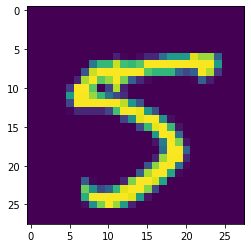

In [133]:
my_number = x_test[102]
plt.imshow(my_number.reshape(28,28))

In [134]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([5])